# Metadata:

This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
- X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. 
- The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar): 
- X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar):
- X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# importing Libraries:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

# Loading dataset:

In [14]:
pd.set_option('display.max_columns', None)
df = pd.read_excel('Data/copy-default-dataset.xls')
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,HIST_9-5,HIST_8-5,HIST_7-5,HIST_6-5,HIST_5-5,HIST_4-5,BILL_9-5,BILL_8-5,BILL_7-5,BILL_6-5,BILL_5-5,BILL_4-5,PAID_9-5,PAID_8-5,PAID_7-5,PAID_6-5,PAID_5-5,PAID_4-5,DEFAULT NEXT MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis:

In [15]:
df.info() #df.info(verbose=True, show_counts=True) , df.iloc[:,-7:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  30000 non-null  int64
 1   LIMIT_BAL           30000 non-null  int64
 2   GENDER              30000 non-null  int64
 3   EDUCATION           30000 non-null  int64
 4   MARRIAGE            30000 non-null  int64
 5   AGE                 30000 non-null  int64
 6   HIST_9-5            30000 non-null  int64
 7   HIST_8-5            30000 non-null  int64
 8   HIST_7-5            30000 non-null  int64
 9   HIST_6-5            30000 non-null  int64
 10  HIST_5-5            30000 non-null  int64
 11  HIST_4-5            30000 non-null  int64
 12  BILL_9-5            30000 non-null  int64
 13  BILL_8-5            30000 non-null  int64
 14  BILL_7-5            30000 non-null  int64
 15  BILL_6-5            30000 non-null  int64
 16  BILL_5-5            30000 non-null  int6

In [16]:
df.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,HIST_9-5,HIST_8-5,HIST_7-5,HIST_6-5,HIST_5-5,HIST_4-5,BILL_9-5,BILL_8-5,BILL_7-5,BILL_6-5,BILL_5-5,BILL_4-5,PAID_9-5,PAID_8-5,PAID_7-5,PAID_6-5,PAID_5-5,PAID_4-5,DEFAULT NEXT MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- There are 30,000 distinct credit card clients.
- The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.
- Education level is mostly graduate school and university.
- Most of the clients are either married or single (less frequent the other status).
- Average age is 35.5 years, with a standard deviation of 9.2.
- As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month.

In [19]:
# Exploring Credit Limits given to customers:
df['LIMIT_BAL'].value_counts().head(10)

LIMIT_BAL
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: count, dtype: int64

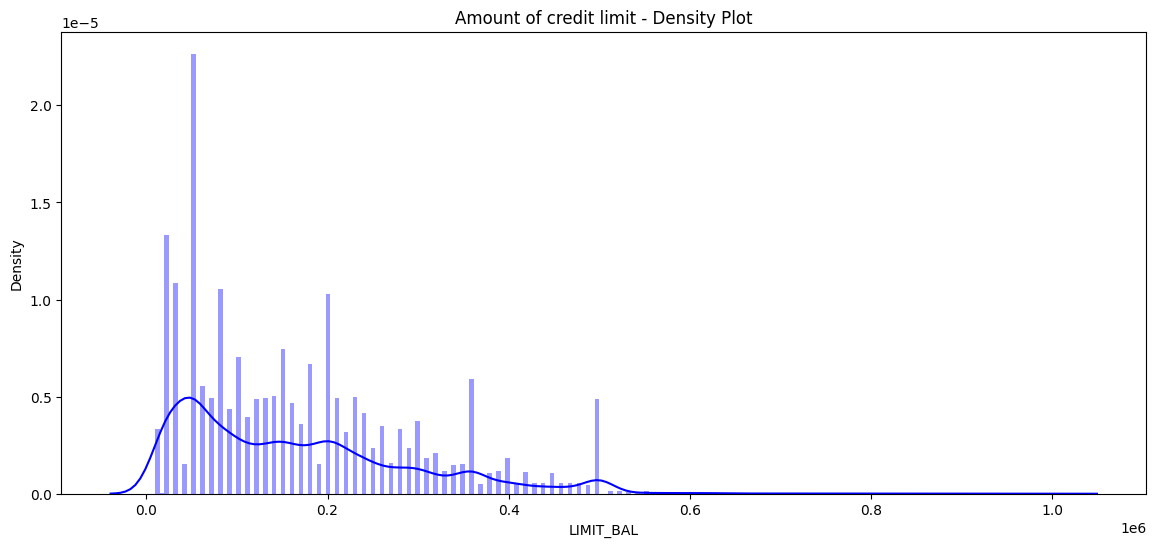

In [17]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

The credit cards having 50,000 limit have been given to 3365 numbers of customers. 

Gender status meaning is:

- 1 : male
- 2 : female

In [30]:
var = df[['GENDER','DEFAULT NEXT MONTH']].value_counts()
var

GENDER  DEFAULT NEXT MONTH
2       0                     14349
1       0                      9015
2       1                      3763
1       1                      2873
Name: count, dtype: int64

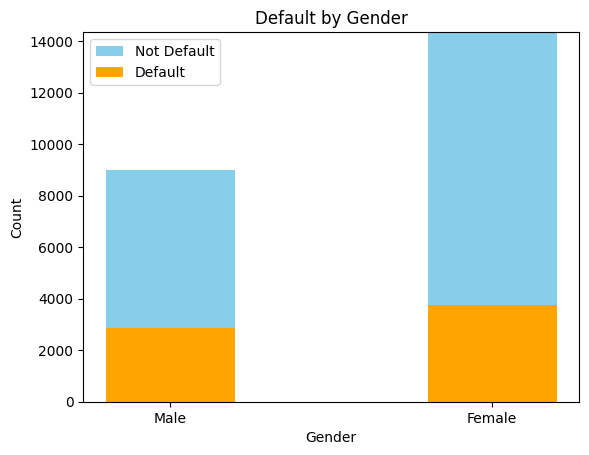

In [38]:
# Data
gen = [2, 1, 2, 1]
default_0 = [14349, 9015, 0, 0]
default_1 = [0, 0, 3765, 2873]

# Create a bar plot
plt.bar(gen, default_0, label='Not Default', color='skyblue', width=0.4)
plt.bar(gen, default_1, bottom=default_0, label='Default', color='orange', width=0.4)

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Default by Gender')
plt.xticks([1, 2], ['Male', 'Female'])
plt.legend()

# Show the plot
plt.show()


# Data Pre-processing:

In [39]:
# Checking missing values
df.isnull().sum()

ID                    0
LIMIT_BAL             0
GENDER                0
EDUCATION             0
MARRIAGE              0
AGE                   0
HIST_9-5              0
HIST_8-5              0
HIST_7-5              0
HIST_6-5              0
HIST_5-5              0
HIST_4-5              0
BILL_9-5              0
BILL_8-5              0
BILL_7-5              0
BILL_6-5              0
BILL_5-5              0
BILL_4-5              0
PAID_9-5              0
PAID_8-5              0
PAID_7-5              0
PAID_6-5              0
PAID_5-5              0
PAID_4-5              0
DEFAULT NEXT MONTH    0
dtype: int64

No Missing Values in the Dataset

In [45]:
df.nunique()

ID                    30000
LIMIT_BAL                81
GENDER                    2
EDUCATION                 7
MARRIAGE                  4
AGE                      56
HIST_9-5                 11
HIST_8-5                 11
HIST_7-5                 11
HIST_6-5                 11
HIST_5-5                 10
HIST_4-5                 10
BILL_9-5              22723
BILL_8-5              22346
BILL_7-5              22026
BILL_6-5              21548
BILL_5-5              21010
BILL_4-5              20604
PAID_9-5               7943
PAID_8-5               7899
PAID_7-5               7518
PAID_6-5               6937
PAID_5-5               6897
PAID_4-5               6939
DEFAULT NEXT MONTH        2
dtype: int64

In [51]:
columns_to_drop = ['ID', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT NEXT MONTH']
X = df.drop(columns_to_drop, axis=1)
y = df['DEFAULT NEXT MONTH']

In [53]:
X.head()

,LIMIT_BAL,HIST_9-5,HIST_8-5,HIST_7-5,HIST_6-5,HIST_5-5,HIST_4-5,BILL_9-5,BILL_8-5,BILL_7-5,BILL_6-5,BILL_5-5,BILL_4-5,PAID_9-5,PAID_8-5,PAID_7-5,PAID_6-5,PAID_5-5,PAID_4-5
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [52]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:
# Standardizing the training data:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
# dumping the scaler to use it when getting inputs from user.
joblib.dump(scaler, "data/scaler.pkl")

['data/scaler.pkl']

In [59]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifiers" : DecisionTreeClassifier(),
    "Random Forest Classifiers" : RandomForestClassifier()
}

# Evaluating models and then comparing their metrics

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    model_performance[name] = [accuracy, precision, recall, f1]

performance_df = pd.DataFrame(model_performance, index=["Accuracy", "Precision", "Recall", "F1 Score"])
performance_df

,Logistic Regression,Decision Tree Classifiers,Random Forest Classifiers
Accuracy,0.809333,0.722833,0.812333
Precision,0.759657,0.601532,0.735622
Recall,0.605644,0.604071,0.650467
F1 Score,0.623033,0.602733,0.672821


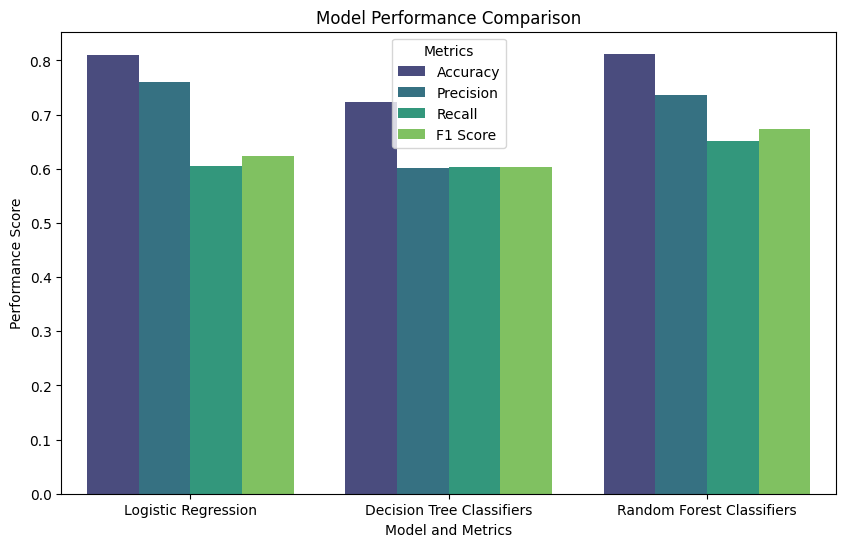

In [60]:
performance_df_long = performance_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')

# Now you can plot with 'Model' and 'Metrics' on x-axis and 'Score' on y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='index', data=performance_df_long, palette='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Model and Metrics")
plt.ylabel("Performance Score")
plt.legend(title='Metrics')
plt.show()

In [63]:
# dumping the model which perfromed well to predict the users input data.

joblib.dump(models["Random Forest Classifiers"], 'data/Random_Forest_Classifiers.pkl')

['data/Random_Forest_Classifiers.pkl']

----